In [1]:
import torch, numpy as np, torch.nn as nn, matplotlib.pyplot as plt
from sklearn import datasets

torch.Size([100, 1])
epoch_10, loss=4297.685
epoch_20, loss=3207.479
epoch_30, loss=2418.927
epoch_40, loss=1847.941
epoch_50, loss=1434.075
epoch_60, loss=1133.812
epoch_70, loss=915.781
epoch_80, loss=757.336
epoch_90, loss=642.106
epoch_100, loss=558.250


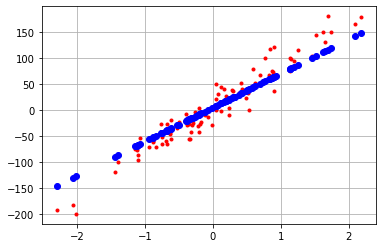

In [2]:
# 1) Design model (inp_size, out_sie, forward_pass)
# 2) Construct loss and opt
# 3) Training loop
#       - forward pass: compute prediction
#       - backward pass: gradients 1
#       - update weights


## 0) prepare data ##
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))
y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape; print(X.shape)

## 1) model ##
inp_size, out_size = n_features, 1
model = nn.Linear(inp_size, out_size)

## 2) loss and opt ##
learning_rate = 0.01
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 3) training loop ##
num_epochs = 100
for epoch in range(num_epochs):
    # forward and loss
    y_pred = model(X)
    loss   = criterion(y_pred, y)

    # backward
    loss.backward()

    # update
    optimiser.step()

    optimiser.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'epoch_{epoch+1}, loss={loss.item():.3f}')

# plot #
pred = model(X).detach().numpy()

# %matplotlib qt
plt.plot(X_numpy, y_numpy, 'r.', label='data')
plt.plot(X_numpy, pred, 'bo', label='pred')
plt.grid()
plt.legend
plt.show()